In [1]:
using Plots, Distributions

# include main code
include("../src/functions.jl")

hjbsolver_delta1 (generic function with 1 method)

In [2]:
p = 120.0;
k = (0.05 / 1.25) * p;
δ = 0.15;

function H(x)
    if x >= 0
        return 1
    else
        return 0
    end
end

function FR12(x, a1, a2)
    lambda1 = 0.25
    lambda2 = 0.5
    return (
        -lambda2 *
        (H(x - a1 - a2) - H(x - a1)) *
        exp(lambda2 * (-x + a1) - lambda1 * a1) +
        lambda1 *
        (H(x - a1 - a2) - H(x - a2)) *
        exp(lambda1 * (-x + a2) - lambda2 * a2) +
        H(x - a2) * exp(-lambda2 * x) * lambda1 -
        H(x - a1) * exp(-lambda1 * x) * lambda2 -
        exp(-lambda2 * x) * lambda1 +
        exp(-lambda1 * x) * lambda2 +
        lambda1 - lambda2
    ) / (lambda1 - lambda2)
end

F1 = SampleDistFun(x -> cdf(Gamma(3, 0.8), x), 40.0, 0.005)
#F2 = SampleDistFun(x -> cdf(Weibull(0.5, 2), x), 40.0, 0.005)
F2(x) = 1 - exp(-0.7071067812 * sqrt(x))


function FR1(x, a)
    if x < a
        return F1(x)
    else
        return 1.0
    end
end

function FR2(x, a2)
    if x < a2
        return F2(x)
    else
        return 1.0
    end
end

FR(r, x) =
    0.3333333333333333 * FR1(x, r[1]) +
    0.4 * FR2(x, r[2]) +
    0.26666666666666666 * FR12(x, r[1], r[2])

function ER1(a) ###Gamma
    beta = 1.25
    return (-a^2 * beta^2 - 4 * a * beta + 6 * exp(a * beta) - 6) * exp(-a * beta) / (2 * beta)
end

ER2(a2) = 4 - (2.828427125 * sqrt(a2) + 4) * exp(-0.7071067812 * sqrt(a2))
function ER12(a1, a2)
    beta1 = 0.25
    beta2 = 0.5
    return 1 / beta1 - exp(-a1 * beta1) / beta1 + 1 / beta2 - exp(-a2 * beta2) / beta2
end
ER(r) =
    0.3333333333333333 * ER1(r[1]) +
    0.4 * ER2(r[2]) +
    0.26666666666666666 * ER12(r[1], r[2])

EnoR = ER([200.0, 100000.0])

4.0

In [3]:
res = bisection_hjbsolver(
    a=166.0,
    b=333.0,
    max_it=20,
    NRe=2,
    β=5.0 + 6.0 + 4.0,
    FR=FR,
    ER=ER,
    EnoR=EnoR,
    partition=(0.0, 10.0, 200.0, 500.0),
    Δx=0.05,
    SearchRanges=([(0.02, 200.0), (0.02, 200.0)], [(1.0, 200.0), (1.0, 200.0)]),
    η=0.25,
    η1=0.3,
    δ=0.15,
    MaxEvals=3000,
    p=p,
    L=300,
)

(166.0, 249.5, 333.0)
10%, V(50.0) = 1040.2   Time = 354.0 seconds
20%, V(100.0) = 1458.7   Time = 1450.0 seconds
30%, V(150.0) = 1871.9   Time = 3350.0 seconds
40%, V(200.0) = 2315.3   Time = 5930.0 seconds
50%, V(250.0) = 2812.2   Time = 5930.0 seconds
60%, V(300.0) = 3392.3   Time = 5930.0 seconds
70%, V(350.0) = 4098.8   Time = 5930.0 seconds
80%, V(400.0) = 4996.9   Time = 5930.0 seconds
90%, V(450.0) = 6185.0   Time = 5930.0 seconds
100%, V(500.0) = 7812.0   Time = 5930.0 seconds


1-element Vector{Any}:
 (0.0:0.05:500.0, [249.5, 251.87435335393792, 254.27196404670008, 256.6375620720833, 258.9847513620357, 261.3200037566447, 263.64701637440976, 265.96805614596906, 268.2845381524241, 270.5973243721427  …  7796.739395950365, 7798.64799763255, 7800.5572522544, 7802.467160086556, 7804.377721399771, 7806.28893646491, 7808.200805552951, 7810.113328934985, 7812.026506882211, 7813.940339665946], [47.48706707875843, 47.95221385524316, 47.311960507664466, 46.94378579904767, 46.7050478921806, 46.540252355300616, 46.42079543118646, 46.329640129100575, 46.25572439437215, 46.1914629861652  …  38.172033643700324, 38.185092437003796, 38.198156643119006, 38.211226264299064, 38.224301302788916, 38.237381760826516, 38.250467640658954, 38.263558944536214, 38.27665567470831, 38.28975783342637], [177.75099352352507 199.99999999999866; 174.63992958299008 199.9999999999978; … ; 133.1557175714244 174.49998789379316; 133.1557175714244 174.49998789379316], 0)

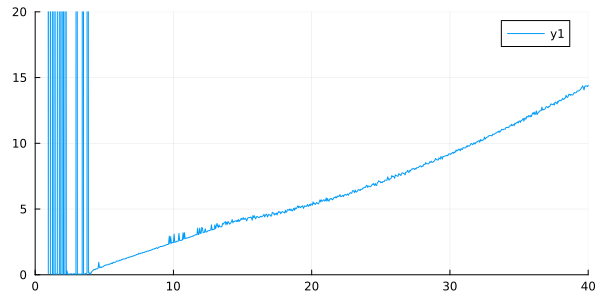

In [4]:
plot(res[end][1], res[end][4][:, 1], size = (600, 300), xlims = (0, 40),ylims = (0, 20))

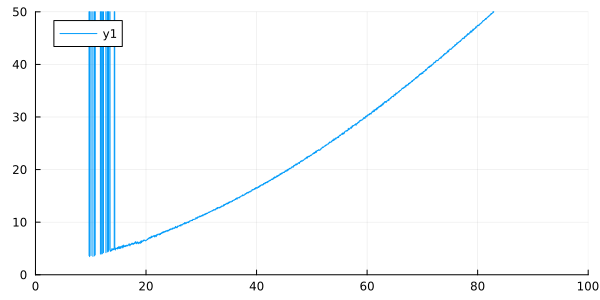

In [5]:
plot(
    res[end][1],
    res[end][4][:, 2],
    size = (600, 300),
    xlims = (0, 100),
    ylims = (0, 50),
)

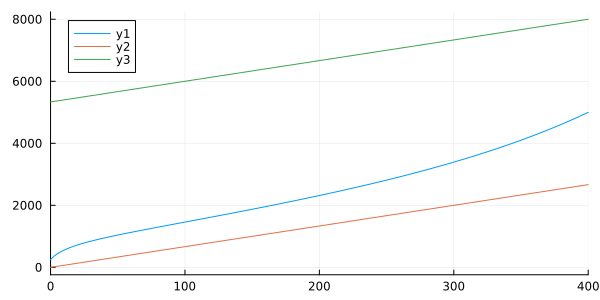

In [6]:
plot(res[1][1], res[1][2], size=(600, 300))
for i = 2:length(res)
    plot!(res[i][1], res[i][2], size=(600, 300))
end
plot!(x -> x / δ, xlims=(0, 400))
plot!(x -> x / δ + p / δ^2, xlims=(0, 400))